<a href="https://www.kaggle.com/code/jiwonkng/tabular-playground-apr-22?scriptVersionId=95773211" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv
/kaggle/input/tabular-playground-series-apr-2022/train.csv
/kaggle/input/tabular-playground-series-apr-2022/test.csv


---

# Step 1. Library and Dataset

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import *
import seaborn as sns

import os

print("Numpy ver.", np.__version__)
print("Pandas ver.", pd.__version__)
print("Matplotlib ver.", matplotlib.__version__)
print("Seaborn ver.", sns.__version__)

print(os.listdir('../input/tabular-playground-series-apr-2022'))

Numpy ver. 1.20.3
Pandas ver. 1.3.5
Matplotlib ver. 3.5.1
Seaborn ver. 0.11.2
['sample_submission.csv', 'train_labels.csv', 'train.csv', 'test.csv']


In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.graphics.tsaplots as sgt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance

import time
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
BASE_DIR = '../input/tabular-playground-series-apr-2022/'
train = pd.read_csv(BASE_DIR + "train.csv")
train_labels = pd.read_csv(BASE_DIR + "train_labels.csv")
test = pd.read_csv(BASE_DIR + "test.csv")
submission = pd.read_csv(BASE_DIR + "sample_submission.csv")
print("Train Data:",train.shape)
print("Train Label Data:",train_labels.shape)
print("Test Data:",test.shape)
print("Sample Data:",submission.shape)

Train Data: (1558080, 16)
Train Label Data: (25968, 2)
Test Data: (733080, 16)
Sample Data: (12218, 2)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558080 entries, 0 to 1558079
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sequence   1558080 non-null  int64  
 1   subject    1558080 non-null  int64  
 2   step       1558080 non-null  int64  
 3   sensor_00  1558080 non-null  float64
 4   sensor_01  1558080 non-null  float64
 5   sensor_02  1558080 non-null  float64
 6   sensor_03  1558080 non-null  float64
 7   sensor_04  1558080 non-null  float64
 8   sensor_05  1558080 non-null  float64
 9   sensor_06  1558080 non-null  float64
 10  sensor_07  1558080 non-null  float64
 11  sensor_08  1558080 non-null  float64
 12  sensor_09  1558080 non-null  float64
 13  sensor_10  1558080 non-null  float64
 14  sensor_11  1558080 non-null  float64
 15  sensor_12  1558080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 190.2 MB


In [6]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25968 entries, 0 to 25967
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sequence  25968 non-null  int64
 1   state     25968 non-null  int64
dtypes: int64(2)
memory usage: 405.9 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733080 entries, 0 to 733079
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sequence   733080 non-null  int64  
 1   subject    733080 non-null  int64  
 2   step       733080 non-null  int64  
 3   sensor_00  733080 non-null  float64
 4   sensor_01  733080 non-null  float64
 5   sensor_02  733080 non-null  float64
 6   sensor_03  733080 non-null  float64
 7   sensor_04  733080 non-null  float64
 8   sensor_05  733080 non-null  float64
 9   sensor_06  733080 non-null  float64
 10  sensor_07  733080 non-null  float64
 11  sensor_08  733080 non-null  float64
 12  sensor_09  733080 non-null  float64
 13  sensor_10  733080 non-null  float64
 14  sensor_11  733080 non-null  float64
 15  sensor_12  733080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 89.5 MB


In [8]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12218 entries, 0 to 12217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sequence  12218 non-null  int64
 1   state     12218 non-null  int64
dtypes: int64(2)
memory usage: 191.0 KB


In [9]:
train.tail()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424
1558079,25967,327,59,-1.136012,-3.702731,-1.332820,-0.766372,-0.430027,-0.091997,-2.512750,-0.022901,-1.1,-0.653902,-0.418516,-1.453704,-1.561381


In [10]:
train_labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [11]:
test.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.0,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.0,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483


In [12]:
submission.head()

,sequence,state
0,25968,0
1,25969,0
2,25970,0
3,25971,0
4,25972,0


---

# Step 2. EDA

## Overview of data

In [13]:
df = train.describe()
display(df.style.format('{:,.2f}')\
        .background_gradient(subset=(df.index[3:], df.columns[3:]),
                             cmap="RdBu", vmin=-700, vmax=700, axis=1))

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,"1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00","1,558,080.00"
mean,"12,983.50",331.63,29.50,0.00,-0.00,-0.22,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.01
std,"7,496.32",195.83,17.32,2.66,4.40,2.30,3.93,1.68,1.59,3.35,3.24,4.50,2.59,1.92,4.53,39.12
min,0.00,0.00,0.00,-375.06,-434.60,-31.66,-408.38,-23.63,-74.98,-470.50,-407.01,-536.10,-270.35,-43.41,-427.06,-612.55
25%,"6,491.75",161.75,14.75,-0.50,-0.48,-0.65,-0.49,-0.47,-0.48,-0.49,-0.50,-0.50,-0.52,-0.48,-0.48,-0.58
50%,"12,983.50",335.00,29.50,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
75%,"19,475.25",501.00,44.25,0.48,0.49,0.33,0.49,0.47,0.51,0.49,0.48,0.50,0.51,0.48,0.49,0.57
max,"25,967.00",671.00,59.00,335.82,449.59,1.67,436.65,24.87,77.92,442.50,331.25,630.10,367.98,41.87,448.02,630.51


In [14]:
df2 = test.describe()
display(df2.style.format('{:,.2f}')\
        .background_gradient(subset=(df2.index[3:], df2.columns[3:]),
                             cmap="RdBu", vmin=-700, vmax=700, axis=1))

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,"733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00","733,080.00"
mean,"32,076.50",829.36,29.50,0.00,-0.00,-0.22,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,"3,527.04",92.61,17.32,2.93,4.60,2.34,4.88,1.88,1.63,3.42,2.77,4.99,2.80,2.11,4.40,40.82
min,"25,968.00",672.00,0.00,-347.38,-457.26,-31.66,-425.28,-24.75,-55.14,-435.77,-299.24,-544.90,-312.63,-43.73,-443.71,-572.73
25%,"29,022.00",750.00,14.75,-0.50,-0.48,-0.58,-0.49,-0.52,-0.51,-0.49,-0.49,-0.50,-0.52,-0.49,-0.48,-0.87
50%,"32,076.50",833.00,29.50,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
75%,"35,131.00",909.00,44.25,0.48,0.49,0.33,0.48,0.52,0.53,0.49,0.48,0.50,0.51,0.49,0.49,0.87
max,"38,185.00",990.00,59.00,403.79,551.54,1.67,498.47,24.54,62.82,484.38,324.04,769.60,306.49,39.19,375.81,536.12


In [15]:
missing = pd.DataFrame({
    'train_miss' : train.isna().sum(),
    'test_miss' : test.isna().sum(),
})
print("Missing Value :")
missing.T

Missing Value :


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
train_miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test_miss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- train 데이터와 test 데이터 모두 결측치는 존재하지 않는다.
- 13가지의 sensor 변수는 대부분이 0 주위의 값을 가지지만, 정상 범위를 벗어난 이상치도 존재하는 것으로 보인다.

## Target Distribution

In [16]:
train = train.merge(train_labels, on='sequence')
train['state'].value_counts()

1    780840
0    777240
Name: state, dtype: int64

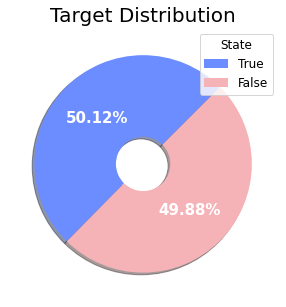

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
labels = list(map(bool, train['state'].value_counts().index))
lst = train['state'].value_counts().to_list()

pie = ax.pie(lst, labels=labels, autopct='%.2f%%',
             textprops=dict(color="white", fontsize=15, weight="bold"),
             colors = ['#6B8DFF', '#F5B3B8'], shadow=True,
             wedgeprops=dict(width=0.75), startangle=45)
ax.set_title("Target Distribution", size=20)
ax.legend(title="State", title_fontsize=12, loc="best", fontsize=12)

plt.show()

- 목표 변수 state는 0과 1로 나누어져 있으며, 그 비율은 거의 비슷하게 나타난다.

## Sequence, Subject, Step

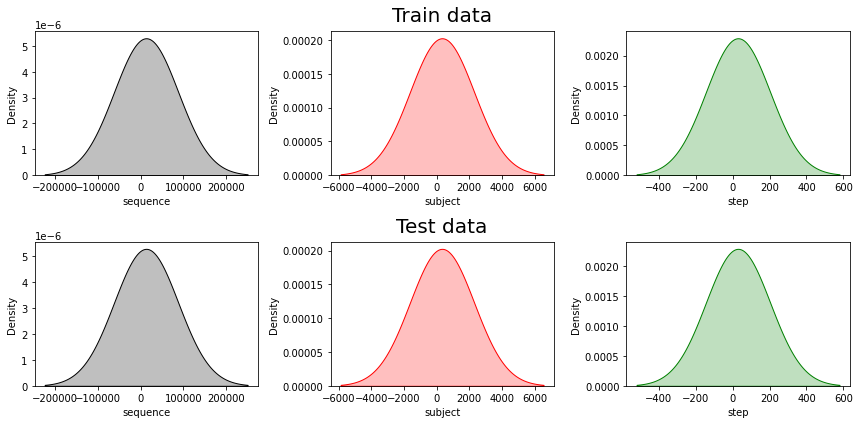

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(12, 3*2))

sns.kdeplot(data=train, x='sequence', shade=True, bw=10, color='black',ax=axes[0][0])
sns.kdeplot(data=train, x='subject', shade=True, bw=10, color='red', ax=axes[0][1])
sns.kdeplot(data=train, x='step', shade=True, bw=10, color='green', ax=axes[0][2])

sns.kdeplot(data=train, x='sequence', shade=True, bw=10, color='black',ax=axes[1][0])
sns.kdeplot(data=train, x='subject', shade=True, bw=10, color='red', ax=axes[1][1])
sns.kdeplot(data=train, x='step', shade=True, bw=10, color='green', ax=axes[1][2])

axes[0][1].set_title("Train data", pad = 10, size=20)
axes[1][1].set_title("Test data", pad = 10, size=20)

plt.tight_layout()
plt.show()

- train 데이터와 test 데이터 모두 sequence, subject, step은 정규분포의 형태를 보인다.

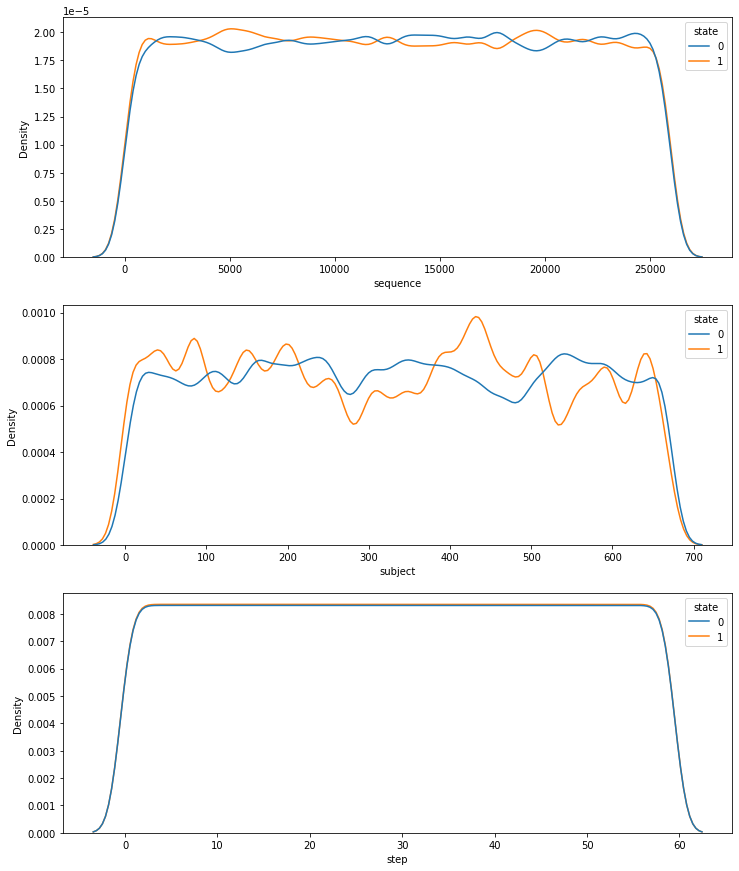

In [19]:
fig, axes = plt.subplots(3,1,figsize=(12,5*3))

sns.kdeplot(data=train,x='sequence', hue='state', ax=axes[0])
sns.kdeplot(data=train,x='subject', hue='state', ax=axes[1])
sns.kdeplot(data=train,x='step', hue='state', ax=axes[2])

plt.show()

- train 데이터에서 sequence는 state의 값에 따른 분포의 차이가 크지 않지만, <br/>subject는 다소 상이한 분포를 보이며, step은 state의 값과 상관 없이 0과 60 사이에서 균일한 분포를 보인다.

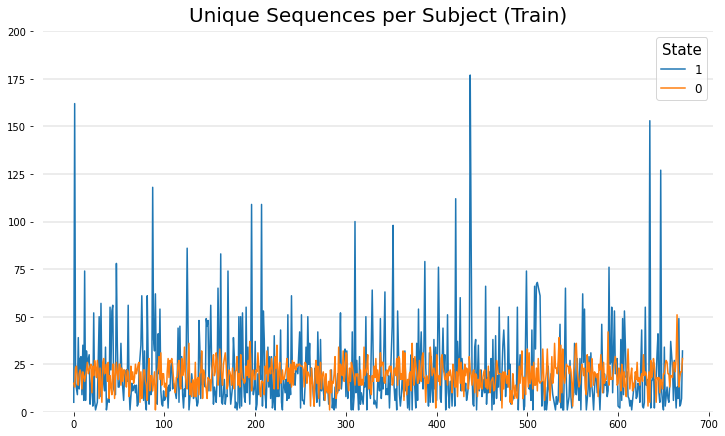

In [20]:
ss = train.groupby(['subject', 'state'])['sequence'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(12,7))

for i in reversed(range(0,2)):
    x = ss[ss['state']==i]['subject']
    y = ss[ss['state']==i]['sequence']
    ax.plot(x,y)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(("outward", 10))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim(0,200)
ax.set_title("Unique Sequences per Subject (Train)", pad = 10, size=20)
ax.legend([1, 0], title="State", title_fontsize=15,
          loc="upper right", fontsize=12)
ax.grid(axis="y", linewidth=0.3, color="gray")
plt.show()

- 각 subject에 대한 고유 sequence의 수는 State 값이 1인 경우에 대체로 큰 값을 보이며, State 값이 0인 경우에는 50 이내에서 비교적 고른 분포를 보인다.

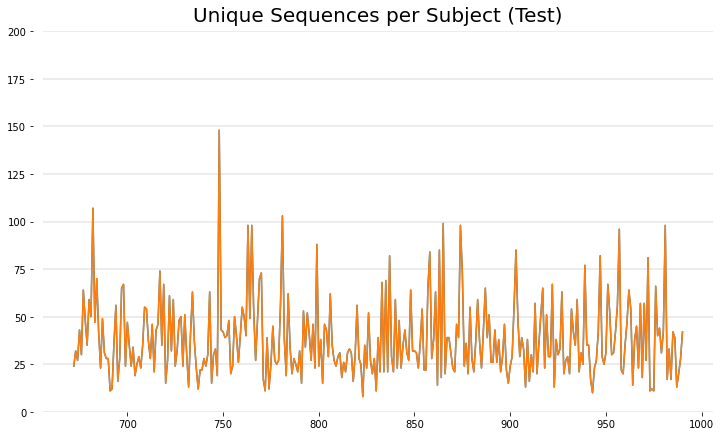

In [21]:
ss = test.groupby(['subject'])['sequence'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(12,7))

for i in reversed(range(0,2)):
    x = ss['subject']
    y = ss['sequence']
    ax.plot(x,y)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(("outward", 10))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim(0,200)
ax.set_title("Unique Sequences per Subject (Test)", pad = 10, size=20)
ax.grid(axis="y", linewidth=0.3, color="gray")
plt.show()

- 같은 맥락으로, Test 데이터에서도 **subject에 대한 고유 sequence의 수**가 state 값에 영향을 미칠 것으로 보인다.

## Sensors Ditributions

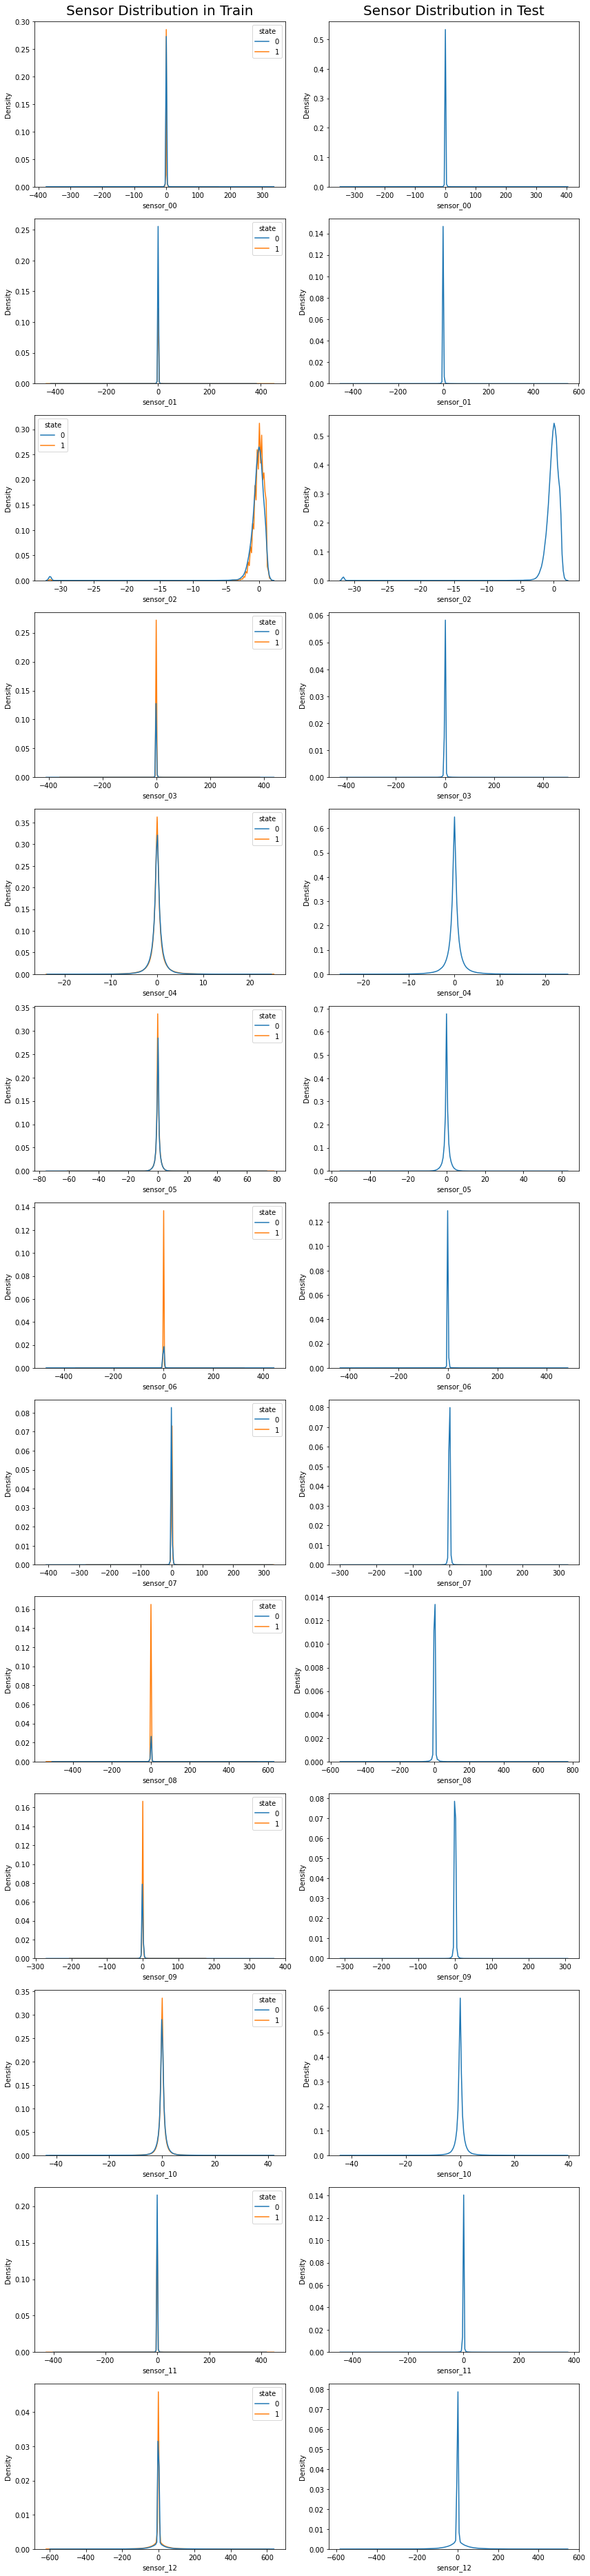

In [22]:
sensors = [col for col in train if col.startswith('sensor')]

fig, axes = plt.subplots(13, 2, figsize=(12, 13*4))

row = 0
for sensor in sensors:
    sns.kdeplot(data=train, x=sensor, hue='state', ax=axes[row][0])
    sns.kdeplot(data=test, x=sensor, ax=axes[row][1])
    row += 1

axes[0][0].set_title("Sensor Distribution in Train", pad = 10, size = 20)
axes[0][1].set_title("Sensor Distribution in Test", pad = 10, size = 20)
    
fig.tight_layout()
plt.show()

- 대부분의 sensor는 0을 기준으로 좌우 대칭의 형태를 띄고 있으나, sensor_02의 경우 왼쪽 꼬리가 긴 분포를 보인다.
- 각 sensor의 이상치로 인해 데이터의 분포를 제대로 확인하기 어려우므로 이상치를 제외한 데이터의 분포를 확인할 필요가 있다.

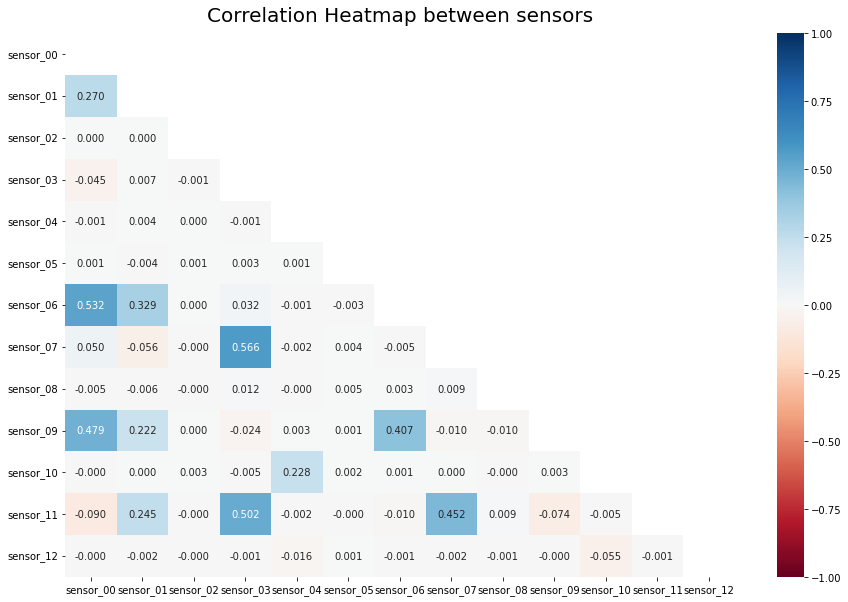

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(train[sensors].corr(), dtype=np.bool))
sns.heatmap(train[sensors].corr(), mask = mask,
            cmap = "RdBu", vmin = -1, vmax = 1, annot = True, fmt = '.3f')
ax.set_title('Correlation Heatmap between sensors', pad = 12, size=20)

plt.show()

- 대부분의 변수들 사이에는 상관관계가 약하거나 거의 없는 것으로 나타나지만, <br/>
  (sensor_00, sensor_06, sensor_09), (sensor_03, sensor_07, sensor_11)은 뚜렷한 양의 상관관계를 가진다.
- 그러나, 상관관계가 있는 변수들을 제거했을 때 모델의 성능이 근소하게 낮아지는 것을 확인하였기 때문에 **제거하지 않고 진행하였다.**

## Outlier Distribution
- Sensor 데이터의 이상치를 IQR 방식으로 탐지한다.
    - 하한값 : 1분위수 - IQR * 1.5
    - 상한값 : 3분위수 + IQR * 1.5
    - 하한값보다 작거나 상한값보다 큰 값을 이상치로 간주한다.

In [24]:
def get_outlier(df, col, weight=1.5):
    q1 = np.percentile(df[col].values, 25)
    q3 = np.percentile(df[col].values, 75)

    iqr = q3 - q1
    low_lim = q1 - iqr * weight
    high_lim = q3 + iqr * weight
    
    idx = df[col][(df[col] < low_lim) | (df[col] > high_lim)].index.to_list()
    return idx

out_sensor = []
for sensor in sensors:
     out_sensor.append(get_outlier(train, sensor))

In [25]:
out_df = pd.DataFrame(index=train.index)
for i, sensor in enumerate(sensors):
    out_df[sensor] = train.index.isin(out_sensor[i])
out_df['tot_count'] = np.sum(out_df, axis=1)

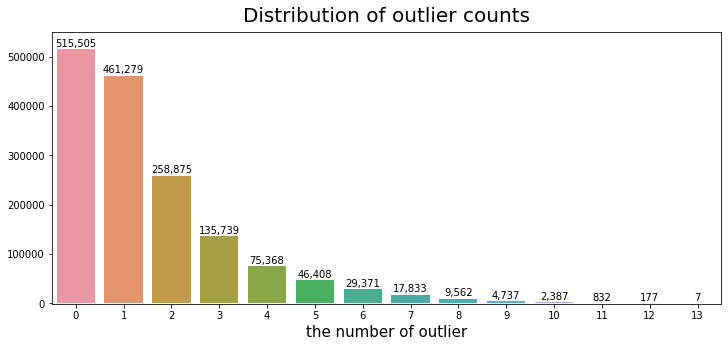

In [26]:
fig, ax = plt.subplots(figsize=(12,5))

sns.countplot(x="tot_count", data=out_df)
ax.set_title("Distribution of outlier counts", pad = 10, size=20)
ax.set_xlabel("the number of outlier", fontsize=15)
ax.set_ylabel("")
ax.set_ylim(-1000,550000)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5000, f'{height:,}', ha = 'center', size = 10)

plt.show()

- train 데이터의 시퀀스별 이상치 개수를 분석한 결과,<br/>이상치가 없는 시퀀스가 전체의 약 3분의 1 정도이고, 반대로 모든 값이 정상 범위를 벗어나는 경우도 존재한다.

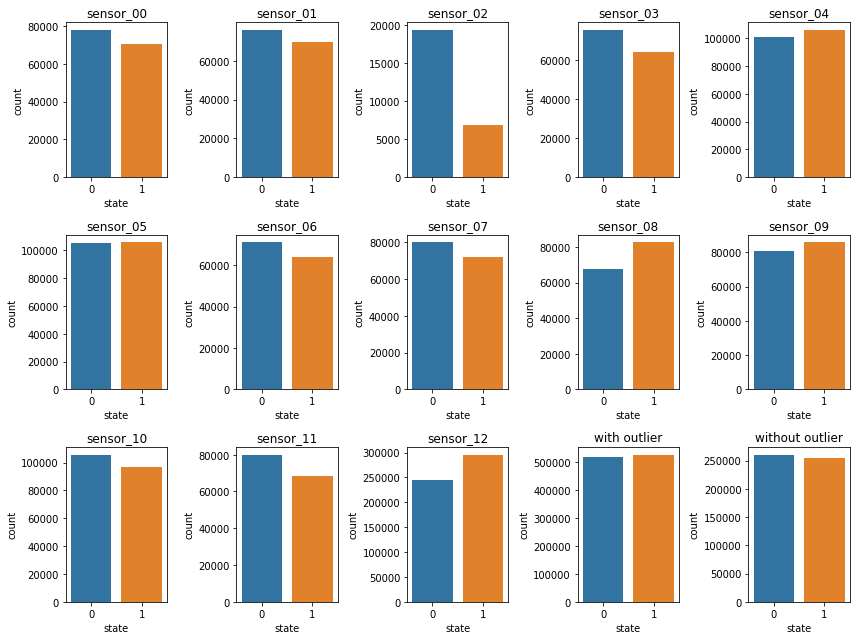

In [27]:
out_df['state'] = train['state']
fig, ax = plt.subplots(3,5,figsize=(12, 9))

for i, sensor in enumerate(sensors):
    sns.countplot(x="state", data=train.iloc[get_outlier(train,sensor)], ax=ax[i//5][i%5])
    ax[i//5][i%5].set_title(sensor)

sns.countplot(x="state", data=out_df[out_df['tot_count']!=0], ax=ax[2][3])
sns.countplot(x="state", data=out_df[out_df['tot_count']==0], ax=ax[2][4])

ax[2][3].set_title("with outlier")
ax[2][4].set_title("without outlier")

fig.tight_layout()
plt.show()

- 각 센서별로 이상치가 있는 sequence의 state 비율은 대부분 차이가 크지 않지만,<br/> sensor_02의 경우에는 state 값이 0인 sequence가 1인 sequence보다 월등히 많다.
- 해당 sequence가 이상치를 포함하느냐 포함하지 않느냐는 state의 비율에 거의 영향을 주지 않는 것으로 보인다.
- 이상치를 제거하거나 평균/중앙값으로 대체한 후 모델의 성능이 근소하게 낮아졌기 때문에 **제거나 대체 없이 진행하였다.**

## Stationary Test
- ADF 및 KPSS 검정을 통해 각 센서 데이터의 정상성을 검정한다.
    + ADF 검정은 메모리 부족으로 실행하지 못했고, KPSS 검정으로 대신한다.

In [28]:
'''def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, maxlag = 100, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4], index=[ "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used", ], 
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)'''

'def adf_test(timeseries):\n    print("Results of Dickey-Fuller Test:")\n    dftest = adfuller(timeseries, maxlag = 100, autolag="AIC")\n    dfoutput = pd.Series(\n        dftest[0:4], index=[ "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used", ], \n    )\n    for key, value in dftest[4].items():\n        dfoutput["Critical Value (%s)" % key] = value\n    print(dfoutput)'

In [29]:
all_df = pd.concat([train, test])
all_df['sequence'].count()

2291160

In [30]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"] 
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [31]:
for sensor in sensors:
    print(sensor)
    kpss_test(all_df[sensor])
    print("--------------------\n")

sensor_00
Results of KPSS Test:
Test Statistic              0.052708
p-value                     0.100000
Lags Used                1239.000000
Critical Value (10%)        0.347000
Critical Value (5%)         0.463000
Critical Value (2.5%)       0.574000
Critical Value (1%)         0.739000
dtype: float64
--------------------

sensor_01
Results of KPSS Test:
Test Statistic              0.027774
p-value                     0.100000
Lags Used                1068.000000
Critical Value (10%)        0.347000
Critical Value (5%)         0.463000
Critical Value (2.5%)       0.574000
Critical Value (1%)         0.739000
dtype: float64
--------------------

sensor_02
Results of KPSS Test:
Test Statistic             0.090332
p-value                    0.100000
Lags Used                752.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
--------------------

sensor_03
Results of KP

- 유의수준을 어떻게 설정하는가에 따라 정상성 검정의 결과가 다르게 나타날 수 있다.
    + 1차 차분을 통한 정상화 과정을 거치는 것이 모델의 성능에 도움이 될 것으로 보인다.

## ACF / PACF
- 각 센서 데이터의 ACF(자기상관함수), PACF(부분자기상관함수)를 그려 자기상관성을 확인한다.
    + 코드 실행 시간이 과도하게 오래 걸려 실행하지 못하였음

In [32]:
'''fig, ax = plt.subplots(13,2)

for i, sensor in enumerate(sensors):
    sgt.plot_acf(train[sensor], lags = 20, zero = True, ax=ax[i][0])
    ax[i][0].set_title("ACF")

    sgt.plot_pacf(train[sensor], lags = 20, zero = True, method = ('ols'), ax=ax[i][1])
    ax[i][1].set_title("PACF")

fig.tight_layout()
plt.show()'''

'fig, ax = plt.subplots(13,2)\n\nfor i, sensor in enumerate(sensors):\n    sgt.plot_acf(train[sensor], lags = 20, zero = True, ax=ax[i][0])\n    ax[i][0].set_title("ACF")\n\n    sgt.plot_pacf(train[sensor], lags = 20, zero = True, method = (\'ols\'), ax=ax[i][1])\n    ax[i][1].set_title("PACF")\n\nfig.tight_layout()\nplt.show()'

---

# Step 3. Feature Engineering

## Sequence Count for each Subject
- EDA 과정에서 각 Subject의 고유 Sequence 개수가 State 값과 관련이 있음을 알아냈다.
    + Subject별 고유 Sequence 개수를 가리키는 변수를 생성하여 모델에 활용한다.

In [33]:
def count_sequences(df):
    count_sequences = (df.groupby('subject').sequence.size()/60).astype(int).reset_index()
    count_sequences['num_sequences'] = count_sequences.sequence
    count_sequences = count_sequences.drop('sequence', axis=1)
    return count_sequences

train_count_sequences = count_sequences(train)
train = train.merge(train_count_sequences, on='subject', how='left')

test_count_sequences = count_sequences(test)
test = test.merge(test_count_sequences, on='subject', how='left')

## Add statistical variables for each sensor
- 시계열 데이터는 원 데이터보다 통계치를 적용한 변수들이 더 정보를 잘 나타내는 경향이 있다.
    + 각 센서의 평균, 중앙값, 표준편차, 최소값, 최대값 등을 변수로 생성한다.

In [34]:
for sensor in sensors:
    train[f'{sensor}_step_diff'] = train.groupby(['sequence','subject'])[sensor].diff()
    train[f'{sensor}_step_diff'].fillna(train[f'{sensor}_step_diff'].median(), inplace=True)
    train[f'{sensor}_step_mean'] = train.groupby(['sequence','subject'])[sensor].transform('mean')
    train[f'{sensor}_step_median'] = train.groupby(['sequence','subject'])[sensor].transform('median')
    train[f'{sensor}_step_std'] = train.groupby(['sequence','subject'])[sensor].transform('std')
    train[f'{sensor}_step_min'] = train.groupby(['sequence','subject'])[sensor].transform('min')
    train[f'{sensor}_step_max'] = train.groupby(['sequence','subject'])[sensor].transform('max')
    
    test[f'{sensor}_step_diff'] = test.groupby(['sequence','subject'])[sensor].diff()
    test[f'{sensor}_step_diff'].fillna(test[f'{sensor}_step_diff'].median(), inplace=True)
    test[f'{sensor}_step_mean'] = test.groupby(['sequence','subject'])[sensor].transform('mean')
    test[f'{sensor}_step_median'] = test.groupby(['sequence','subject'])[sensor].transform('median')
    test[f'{sensor}_step_std'] = test.groupby(['sequence','subject'])[sensor].transform('std')
    test[f'{sensor}_step_min'] = test.groupby(['sequence','subject'])[sensor].transform('min')
    test[f'{sensor}_step_max'] = test.groupby(['sequence','subject'])[sensor].transform('max')

## Differenced Signals of Sensors

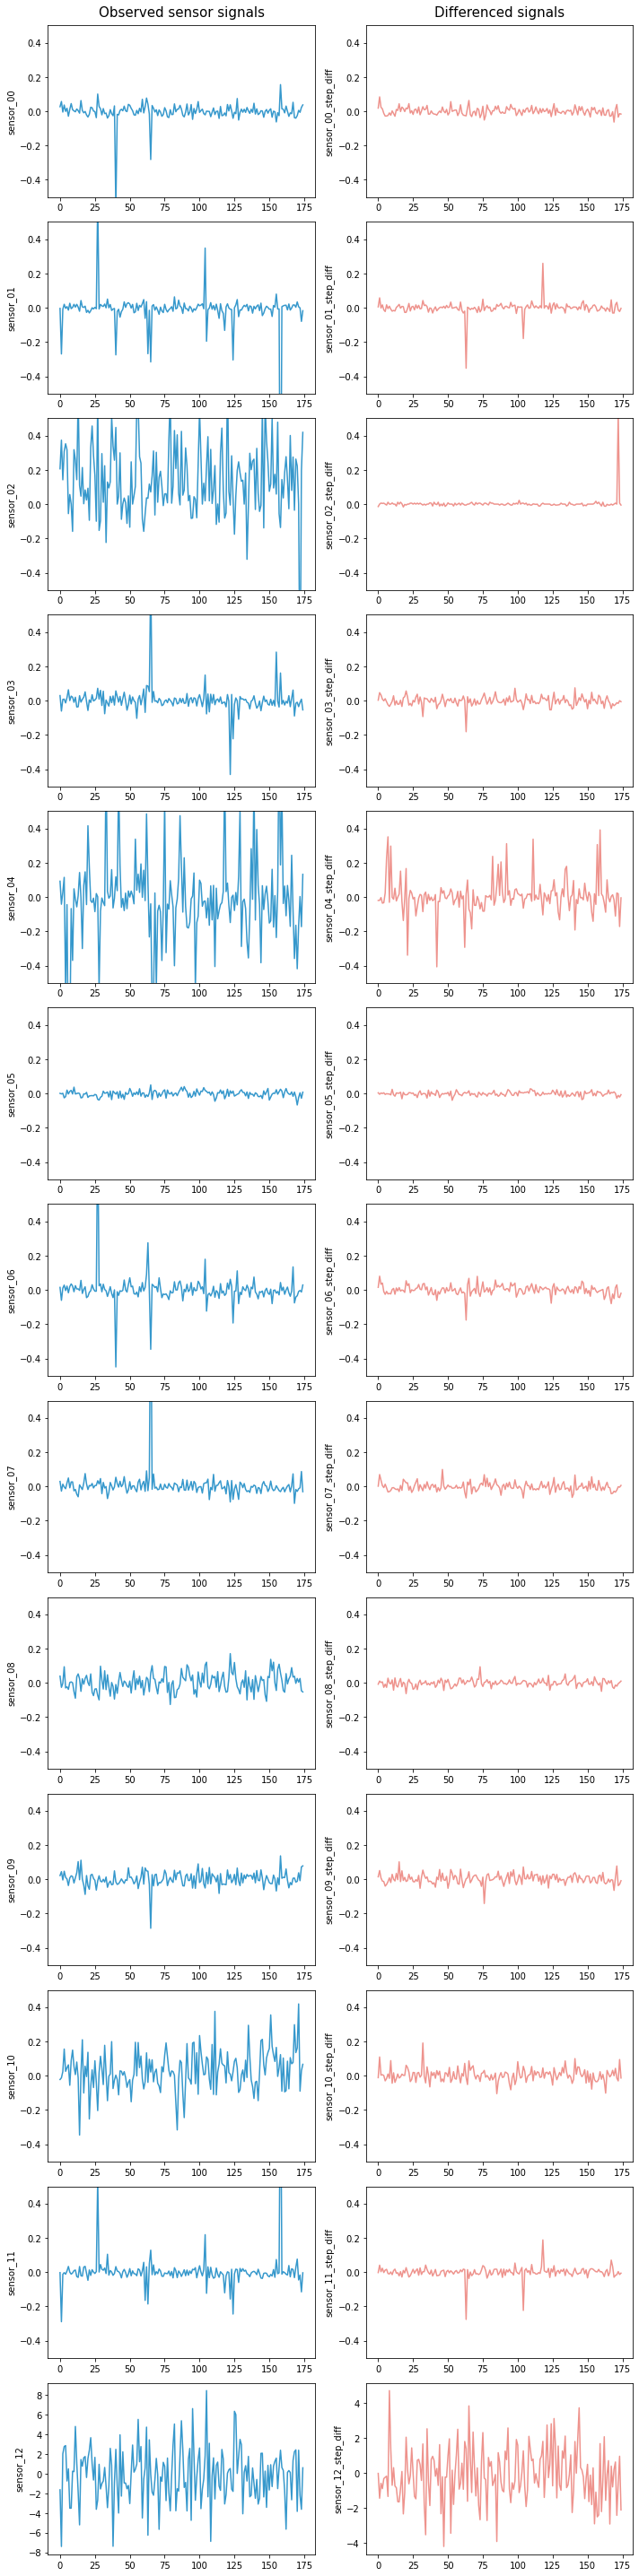

In [35]:
fig, axes = plt.subplots(13,2,figsize=(10,40))
train_1 = train[train.subject==1]

row = 0
for i,sensor in enumerate(sensors): 
    x = np.arange(0, train_1.sequence.nunique())
    y = train_1.groupby('sequence')[sensor].mean()
    sns.lineplot(x,y, ax=axes[row][0], color='#3698CC')
    row += 1
    
row = 0    
sensor_diff = [col for col in train_1.columns if 'diff' in col]
for i,sensor in enumerate(sensor_diff):
    x = np.arange(0, train_1.sequence.nunique())
    y = train_1.groupby('sequence')[sensor].mean()
    sns.lineplot(x,y, ax=axes[row][1], color='#EE938D')
    row += 1

axes[0][0].set_title("Observed sensor signals", pad = 10, size = 15)
axes[0][1].set_title("Differenced signals", pad = 10, size = 15)

for i in range(12):
    axes[i][0].set_ylim(-0.5,0.5)
    axes[i][1].set_ylim(-0.5,0.5)
    
fig.tight_layout()
plt.show()

---

# Step 4. PCA

In [36]:
y = train['state'].copy()
X = train.drop('state', axis=1).copy()
X_test = test.copy()

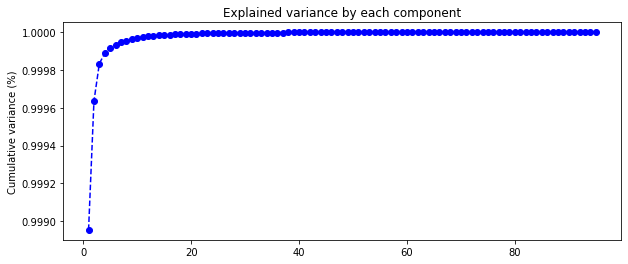

Explained variance by each component
Component 1 : 0.9990
Component 2 : 0.0007
Component 3 : 0.0002
Component 4 : 0.0001
Component 5 : 0.0000
Component 6 : 0.0000


In [37]:
pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

ax.plot(xi, yi, marker='o', linestyle='--', color='b')
ax.set_label('Number of Components')
ax.set_ylabel('Cumulative variance (%)')
ax.set_title('Explained variance by each component')
plt.show()

print('Explained variance by each component')
for i, val in enumerate(pca.explained_variance_ratio_):
    print(f'Component {i+1} : {val:.4f}')
    if i == 5:
        break

- 주성분 2개가 전체 분산의 99.97%를 설명하므로, 주성분의 개수를 2개로 지정하고 PCA 분석을 실시하였다.

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(1558080, 2)


In [39]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance : {total_var:.2f} %')

Total Explained Variance : 99.96 %


---

# Step 5. Modeling

## Data Split

In [40]:
# Existing Data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("Train data\t:", X_train.shape, y_train.shape)
print("Validation data\t:", X_val.shape, y_val.shape)

Train data	: (1090656, 95) (1090656,)
Validation data	: (467424, 95) (467424,)


In [41]:
# PCA Data
X_pca_train, X_pca_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.3, random_state=42)
print("Train data\t:", X_pca_train.shape, y_train.shape)
print("Validation data\t:", X_pca_val.shape, y_val.shape)

Train data	: (1090656, 2) (1090656,)
Validation data	: (467424, 2) (467424,)


## Logistic Regression

In [42]:
%%time

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

CPU times: user 53.8 s, sys: 7.38 s, total: 1min 1s
Wall time: 32.7 s


In [43]:
%%time

lr.fit(X_pca_train, y_train)
y_pca_pred = lr.predict(X_pca_val)

CPU times: user 1.43 s, sys: 573 ms, total: 2.01 s
Wall time: 1.04 s


In [44]:
%%time

splitter = StratifiedKFold(n_splits = 3, shuffle = True, random_state=42)
scores = cross_validate(lr, X_train, y_train, return_train_score = True, cv=splitter)
scores_pca = cross_validate(lr, X_pca_train, y_train, return_train_score = True, cv=splitter)

print("Exsisting Data :", np.mean(scores['train_score']), np.mean(scores['test_score']))
print("PCA Data :", np.mean(scores_pca['train_score']), np.mean(scores_pca['test_score']))

Exsisting Data : 0.6652904307132589 0.6653821186515271
PCA Data : 0.5052344643957398 0.505242716310184
CPU times: user 1min 47s, sys: 17.2 s, total: 2min 4s
Wall time: 1min 7s


- PCA 후에 로지스틱 모델의 교차검증 정확도가 더 낮아지는 것으로 보아, 해당 주성분들은 데이터를 효과적으로 집약하지 못한다고 할 수 있다.

In [45]:
pd.DataFrame(confusion_matrix(y_val, y_pred),
                index = [["actual", "actual"], ["N", "P"]],
                columns = [["pred", "pred"], ["N", "P"]])

pred        
               N       P
actual N  156524   76479
       P   72745  161676

In [46]:
print("Acc. :", accuracy_score(y_val, y_pred))
print("Prec. :", precision_score(y_val, y_pred))
print('Recall :', recall_score(y_val, y_pred))
print('f1. :', f1_score(y_val, y_pred))

Acc. : 0.6807523789963716
Prec. : 0.6788688039302135
Recall : 0.6896822383660167
f1. : 0.6842328006500543


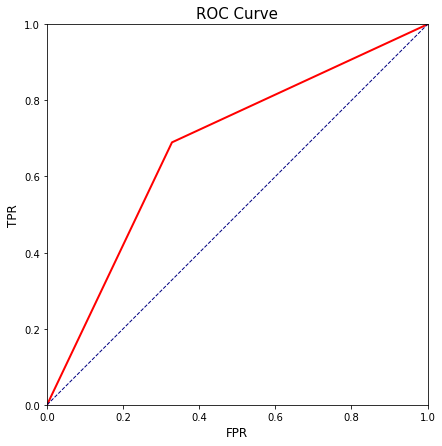

AUC Score: 0.6807252065123561


In [47]:
fig, ax = plt.subplots(figsize=(7,7))

fpr, tpr, _ = roc_curve(y_val, y_pred)
ax.plot(fpr, tpr, color='r', lw=2)
ax.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.gca().set_aspect('equal')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("FPR", size=12)
ax.set_ylabel("TPR", size=12)
ax.set_title("ROC Curve", size=15)

plt.show()

print("AUC Score:", roc_auc_score(y_val, y_pred))

- 로지스틱 회귀 모델의 경우, 약 68%의 정확도를 보이고 AUC 점수 또한 약 0.68로 계산되었다.

## LightGBM

In [48]:
%%time

lgb = LGBMClassifier(random_state=42)

lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_val)

CPU times: user 1min 49s, sys: 756 ms, total: 1min 49s
Wall time: 57.9 s


In [49]:
%%time

lgb_pca = LGBMClassifier(random_state=42)

lgb_pca.fit(X_pca_train, y_train)
y_pca_pred = lgb_pca.predict(X_pca_val)

CPU times: user 9.95 s, sys: 31.3 ms, total: 9.98 s
Wall time: 5.52 s


In [50]:
%%time

splitter = StratifiedKFold(n_splits = 3, shuffle = True, random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)
scores_pca = cross_validate(lgb_pca, X_pca_train, y_train, return_train_score = True, cv=splitter)

print("Exsisting Data :", np.mean(scores['train_score']), np.mean(scores['test_score']))
print("PCA Data :", np.mean(scores_pca['train_score']), np.mean(scores_pca['test_score']))

Exsisting Data : 0.8949879705424992 0.8929020699468944
PCA Data : 0.6563265594284541 0.6538734486400846
CPU times: user 4min 41s, sys: 3.02 s, total: 4min 44s
Wall time: 2min 33s


- PCA 후에 LightGBM 모델의 교차검증 정확도가 더 낮아지는 것으로 보아, 해당 주성분들은 데이터를 효과적으로 집약하지 못한다고 할 수 있다.

In [51]:
print("Acc. :", accuracy_score(y_val, y_pred))
print("Prec. :", precision_score(y_val, y_pred))
print('Recall :', recall_score(y_val, y_pred))
print('f1. :', f1_score(y_val, y_pred))

Acc. : 0.892483056069008
Prec. : 0.8679988010790288
Recall : 0.9265168222983435
f1. : 0.8963036938301358


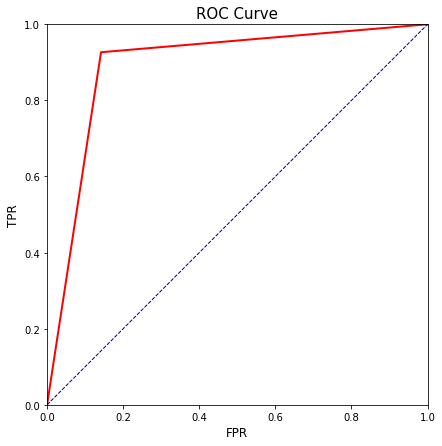

AUC Score: 0.8923794954270566


In [52]:
fig, ax = plt.subplots(figsize=(7,7))

fpr, tpr, _ = roc_curve(y_val, y_pred)
ax.plot(fpr, tpr, color='r', lw=2)
ax.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.gca().set_aspect('equal')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel("FPR", size=12)
ax.set_ylabel("TPR", size=12)
ax.set_title("ROC Curve", size=15)

plt.show()

print("AUC Score:", roc_auc_score(y_val, y_pred))

- LightGBM 모델의 경우, 약 89%의 정확도를 보이고 AUC 점수 또한 약 0.89로 계산된다.

## Permutation Importance

In [53]:
result = permutation_importance(lgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

In [54]:
importance = pd.DataFrame({"Feature" : X_val.columns[sorted_idx], 
                           "Importance" : result.importances_mean[sorted_idx]})\
                        .sort_values("Importance", ascending=False).reset_index(drop=True)
importance.style.background_gradient(cmap="RdBu", vmin=-0.1, vmax=0.1)

,Feature,Importance
0,num_sequences,0.084277
1,sensor_02_step_std,0.084024
2,sensor_04_step_std,0.032899
3,sensor_04_step_max,0.022682
4,sensor_10_step_std,0.019852
5,sensor_04_step_mean,0.016407
6,sensor_05_step_mean,0.011992
7,sensor_04_step_median,0.011707
8,sensor_04_step_min,0.010060
9,sensor_10_step_mean,0.009579


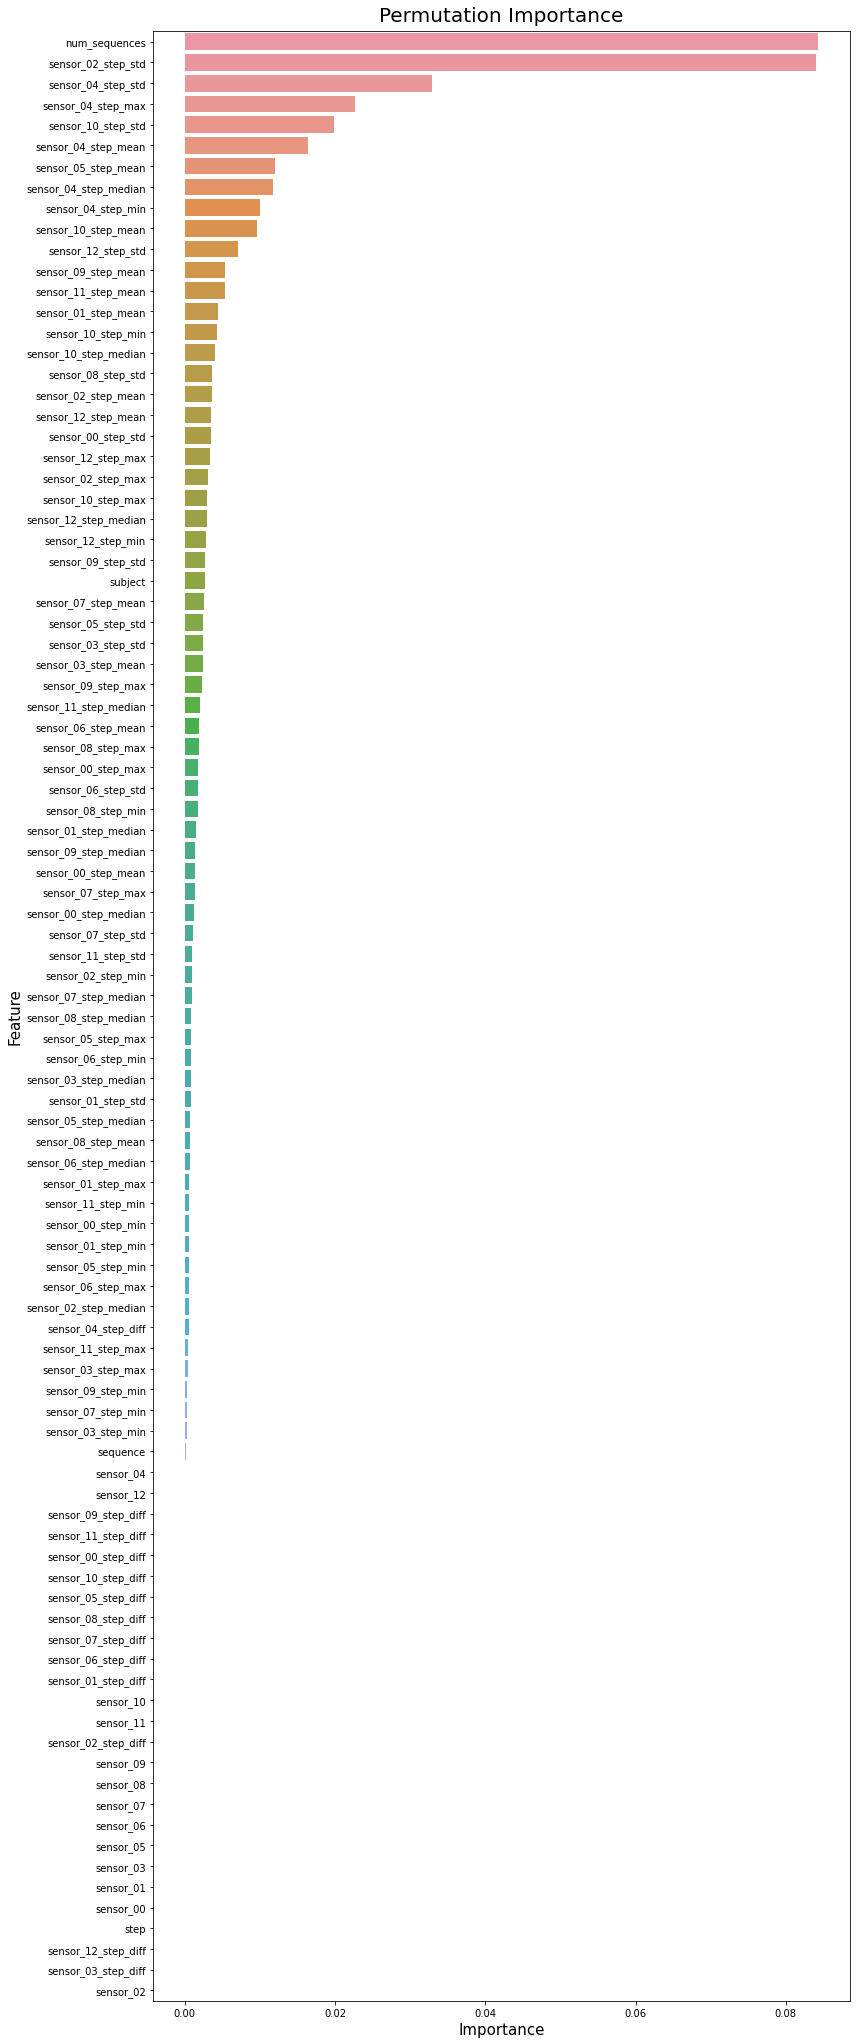

In [55]:
fig, ax = plt.subplots(figsize=(12,len(importance)*0.3))
sns.barplot(x = "Importance", y = "Feature", data=importance)
ax.set_title("Permutation Importance", pad = 10, size = 20)
# ax.set_xlim(-0.001, 0.13)
ax.set_xlabel("Importance", fontsize=15)
ax.set_ylabel("Feature", fontsize=15)
fig.tight_layout()
plt.show()

- LightGBM 모델에 대한 순열 중요도를 살펴본 결과, num_sequences와 sensor_02_step_std이 가장 큰 값을 가진다.
    + 앞서 각 subject에 대한 고유 sequence의 수를 새로운 변수로 추가했던 것이 모델의 성능 향상에 큰 영향을 미친 것으로 보인다.
    + 또한, 불균형한 분포를 보인 sensor_02의 표준편차 값 역시 모델의 성능 향상에 큰 영향을 미친 것으로 보인다.
    + 센서 데이터의 차분 변수가 모델의 성능 향상에 영향을 미쳤지만, 그 효과가 크지 않은 것으로 보인다.
- 많은 변수들의 중요도가 0으로 나타나지만, 중요도가 음수로 나오는 변수는 없기 때문에 추가적인 변수 선택은 생략한다.

# Step 7. Submission

In [56]:
lgb_test= lgb.predict(X_test)
pred = pd.DataFrame({"sequence":test['sequence'],
                     "state":lgb_test.tolist()})
pred['state'].value_counts()

0    376259
1    356821
Name: state, dtype: int64

In [57]:
pred_fin = pred.groupby('sequence').mean().reset_index()
pred_fin['state'].unique()

array([1.        , 0.        , 0.71666667, 0.63333333, 0.05      ,
       0.75      , 0.58333333, 0.76666667, 0.1       , 0.21666667,
       0.96666667, 0.36666667, 0.03333333, 0.01666667, 0.18333333,
       0.13333333, 0.3       , 0.83333333, 0.53333333, 0.5       ,
       0.08333333, 0.28333333, 0.61666667, 0.56666667, 0.11666667,
       0.33333333, 0.85      , 0.93333333, 0.45      , 0.8       ,
       0.15      , 0.91666667, 0.7       , 0.31666667, 0.88333333,
       0.81666667, 0.95      , 0.98333333, 0.23333333, 0.06666667,
       0.48333333, 0.2       , 0.55      , 0.78333333])

In [58]:
submission['state'] = pred_fin['state']
submission

,sequence,state
0,25968,1.0
1,25969,1.0
2,25970,0.0
3,25971,0.0
4,25972,1.0
...,...,...
12213,38181,1.0
12214,38182,0.0
12215,38183,1.0
12216,38184,0.0


In [59]:
submission.to_csv('submission.csv', index=False)